<a href="https://colab.research.google.com/github/KIRTIKUMARKK21/Data-Science/blob/master/YouTubeAnalaysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
comments=pd.read_csv("/content/drive/MyDrive/Data Science/Youtube/GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [13]:
comments.shape

(718424, 4)

# sentiment analysis of youtube_comments

In [ ]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [10]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
comments.dropna(inplace=True)

In [14]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [15]:
comments['polarity']=polarity

In [16]:
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


### Analysing most frequently used positive and negative words

In [17]:
comments_positive=comments[comments['polarity']==1]

In [18]:
comments_positive.shape

(20400, 5)

In [19]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [ ]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
stopwords=set(STOPWORDS)

In [23]:
total_comments=' '.join(comments_positive['comment_text'])

In [24]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

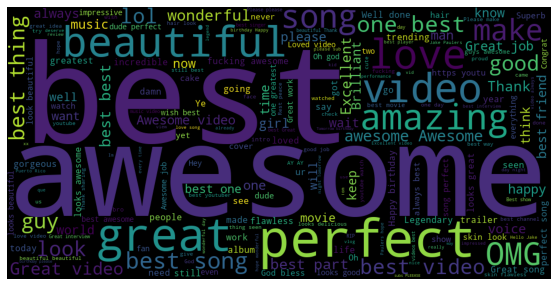

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Now for Negative Comments

In [28]:
comments_negative=comments[comments['polarity']==-1]

In [29]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0


In [30]:
total_negcomments=' '.join(comments_negative['comment_text'])

In [33]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_negcomments)

(-0.5, 999.5, 499.5, -0.5)

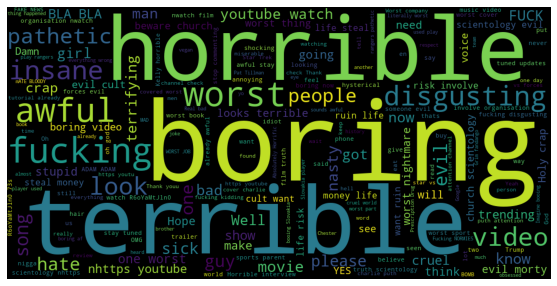

In [34]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

##Analysing Tags column,what are trending tags on youtube¶

In [39]:
vedios=pd.read_csv("/content/drive/MyDrive/Data Science/Youtube/USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [41]:
vedios.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [42]:
tags=" ".join(vedios['tags'])

In [ ]:
tags

In [44]:
import re

In [46]:
tags=re.sub('[^a-zA-Z]',' ',tags)

In [47]:
tags=re.sub(' +',' ',tags)

In [48]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

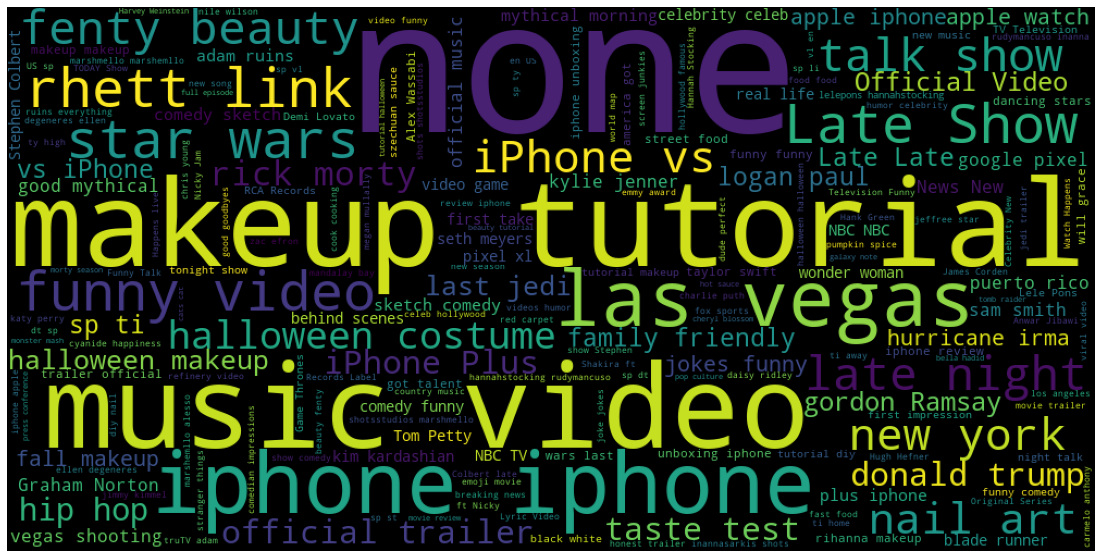

In [51]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for views & likes')

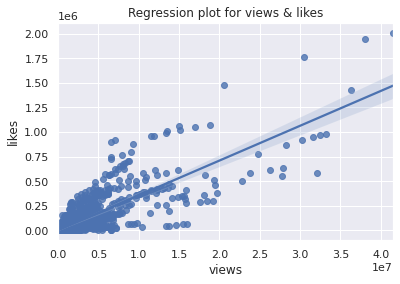

In [55]:
sns.regplot(data=vedios,x='views',y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

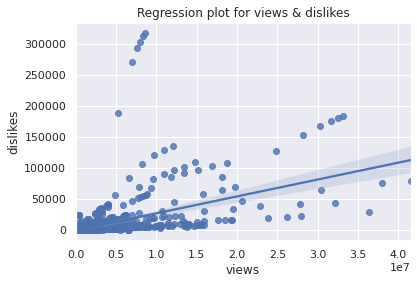

In [57]:
sns.regplot(data=vedios,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')


###Correlation matrix is the evidence of above analysis

In [58]:
df_corr=vedios[['views','likes','dislikes']]

In [59]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


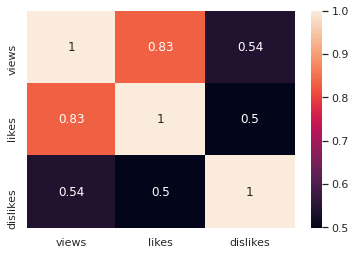

In [60]:
sns.heatmap(df_corr.corr(),annot=True)

##Analyse Emojis in comments

In [74]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [76]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [77]:
print('\U0001F600')

😀


In [64]:
!pip install emoji

     |████████████████████████████████| 133kB 35.4MB/s 


In [91]:
import emoji

In [87]:
comment=comments['comment_text'][1]
comment

'To be there with a samsung phone\\n😂😂😂'

In [93]:
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [94]:
extract_emojis('To be there with a samsung phone\n😂😂😂')

'😂😂😂'

In [96]:
s=''
for i in comments['comment_text']:
  s=s+extract_emojis(i)

In [97]:
len(s)

333278

In [101]:
s[:500]

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤'

##lets create a dictionary of having each emoji with its frequency as well

```

```



In [102]:
result={}
for i in set(s):
    result[i]=s.count(i)

In [103]:
result

{'🙆': 158,
 '🚥': 8,
 '🥈': 4,
 '🌏': 32,
 '↙': 9,
 '🧒': 2,
 '🕴': 6,
 '🐨': 39,
 '🏌': 4,
 '🐽': 21,
 '🎟': 6,
 '👛': 16,
 '🛫': 8,
 '💓': 1579,
 '🦂': 15,
 '🔂': 5,
 '🏛': 15,
 '🚏': 6,
 '👀': 596,
 '🍽': 8,
 '🎎': 8,
 '🛅': 6,
 '🎦': 21,
 '🏭': 16,
 '👅': 193,
 '🐊': 61,
 '🔹': 96,
 '🔓': 17,
 '🙄': 765,
 '🖍': 4,
 '🤯': 3,
 '❓': 42,
 '🌞': 119,
 '❔': 19,
 '🤬': 4,
 '🎍': 17,
 '🚭': 9,
 '🤕': 35,
 '💀': 892,
 '🦅': 19,
 '🍙': 11,
 '🈳': 5,
 '💕': 6531,
 '🛠': 6,
 '🏓': 6,
 '🛌': 13,
 '🤩': 10,
 '🌷': 97,
 '🥘': 6,
 '🔼': 5,
 '🔊': 58,
 '🌀': 16,
 '🥜': 1,
 '👸': 125,
 '📫': 8,
 '🌎': 127,
 '🍔': 54,
 '👊': 376,
 '⤵': 6,
 '🚀': 56,
 '🌦': 19,
 '⛱': 5,
 '😠': 473,
 '🏑': 12,
 '🛣': 4,
 '📰': 16,
 '☦': 4,
 '💳': 41,
 '🐋': 19,
 '🚦': 6,
 '🌸': 324,
 '🤰': 7,
 '🤪': 10,
 '🍟': 49,
 '🔪': 92,
 '🔏': 9,
 '👬': 47,
 '⛎': 9,
 '😊': 4946,
 '🔭': 13,
 '🌶': 45,
 '🛒': 1,
 '🍾': 143,
 '💾': 13,
 '❗': 150,
 '➿': 5,
 '👓': 66,
 '🌰': 54,
 '🔨': 33,
 '🕊': 35,
 '😮': 596,
 '🈲': 5,
 '🌼': 92,
 '💅': 166,
 '🏄': 15,
 '🆎': 5,
 '🔇': 7,
 '🔀': 6,
 '🍶': 17,
 '🔈': 7,
 '⚔': 10,
 '🧞': 6,

In [104]:
# sort the emojis according to its count or frequency

In [105]:
result.items()

dict_items([('🙆', 158), ('🚥', 8), ('🥈', 4), ('🌏', 32), ('↙', 9), ('🧒', 2), ('🕴', 6), ('🐨', 39), ('🏌', 4), ('🐽', 21), ('🎟', 6), ('👛', 16), ('🛫', 8), ('💓', 1579), ('🦂', 15), ('🔂', 5), ('🏛', 15), ('🚏', 6), ('👀', 596), ('🍽', 8), ('🎎', 8), ('🛅', 6), ('🎦', 21), ('🏭', 16), ('👅', 193), ('🐊', 61), ('🔹', 96), ('🔓', 17), ('🙄', 765), ('🖍', 4), ('🤯', 3), ('❓', 42), ('🌞', 119), ('❔', 19), ('🤬', 4), ('🎍', 17), ('🚭', 9), ('🤕', 35), ('💀', 892), ('🦅', 19), ('🍙', 11), ('🈳', 5), ('💕', 6531), ('🛠', 6), ('🏓', 6), ('🛌', 13), ('🤩', 10), ('🌷', 97), ('🥘', 6), ('🔼', 5), ('🔊', 58), ('🌀', 16), ('🥜', 1), ('👸', 125), ('📫', 8), ('🌎', 127), ('🍔', 54), ('👊', 376), ('⤵', 6), ('🚀', 56), ('🌦', 19), ('⛱', 5), ('😠', 473), ('🏑', 12), ('🛣', 4), ('📰', 16), ('☦', 4), ('💳', 41), ('🐋', 19), ('🚦', 6), ('🌸', 324), ('🤰', 7), ('🤪', 10), ('🍟', 49), ('🔪', 92), ('🔏', 9), ('👬', 47), ('⛎', 9), ('😊', 4946), ('🔭', 13), ('🌶', 45), ('🛒', 1), ('🍾', 143), ('💾', 13), ('❗', 150), ('➿', 5), ('👓', 66), ('🌰', 54), ('🔨', 33), ('🕊', 35), ('😮', 596), (

In [108]:
result=dict(sorted(result.items(), key=lambda item: item[1]))

In [109]:
result

{'🥜': 1,
 '🛒': 1,
 '🤹': 1,
 '🧤': 1,
 '🤟': 1,
 '🥌': 1,
 '🥚': 1,
 '🤺': 1,
 '🥟': 1,
 '🧣': 1,
 '🦓': 1,
 '🥡': 1,
 '🥨': 1,
 '🤾': 1,
 '🧠': 1,
 '🤽': 1,
 '🛷': 1,
 '🦏': 1,
 '🧒': 2,
 '🎌': 2,
 '🧛': 2,
 '🧡': 2,
 '🦖': 2,
 '🤱': 2,
 '🧘': 2,
 '🧝': 2,
 '🦕': 2,
 '🦔': 2,
 '🥅': 2,
 '🧢': 2,
 '🤯': 3,
 '🤫': 3,
 '🧐': 3,
 '🤨': 3,
 '🥄': 3,
 '🥖': 3,
 '🥈': 4,
 '🏌': 4,
 '🖍': 4,
 '🤬': 4,
 '🛣': 4,
 '☦': 4,
 '⏏': 4,
 '⚗': 4,
 '🛢': 4,
 '⏯': 4,
 '🦆': 4,
 '🥞': 4,
 '💹': 4,
 '🏷': 4,
 '🧟': 4,
 '☸': 4,
 '🦍': 4,
 '⚙': 4,
 '🖇': 4,
 '🗓': 4,
 '🤵': 4,
 '🛬': 4,
 '⏹': 4,
 '♟': 4,
 '⏸': 4,
 '🗄': 4,
 '⚧': 4,
 '♾': 4,
 '🥝': 4,
 '🗂': 4,
 '🦐': 4,
 '⏲': 4,
 '🔂': 5,
 '🈳': 5,
 '🔼': 5,
 '⛱': 5,
 '➿': 5,
 '🈲': 5,
 '🆎': 5,
 '◽': 5,
 '🈁': 5,
 '🔤': 5,
 '🏮': 5,
 '⛏': 5,
 '↪': 5,
 '⚒': 5,
 '🔃': 5,
 '🚁': 5,
 '🚻': 5,
 '🤮': 5,
 '🎐': 5,
 '🚠': 5,
 'ℹ': 5,
 '⚾': 5,
 '🥉': 5,
 '🈹': 5,
 '🈴': 5,
 '♦': 5,
 '🈵': 5,
 '✡': 5,
 '⏺': 5,
 '🔁': 5,
 '🔚': 5,
 '🌫': 5,
 '🔲': 5,
 '🚉': 5,
 '㊙': 5,
 '🦒': 5,
 'Ⓜ': 5,
 '🔠': 5,
 '🛥': 5,
 '↕': 5,
 '🗞': 5,
 '🚛': 5,
 '♠': 5,
 

In [110]:
keys=[*result.keys()]

In [111]:
values=[*result.values()]

In [112]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [113]:
df

,chars,num
0,🙌,2734
1,🏼,2961
2,💙,2968
3,💗,3071
4,👌,3534
5,💜,3616
6,🏻,4412
7,💖,4809
8,😊,4946
9,👏,5357


In [114]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [115]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])